# Part I - Ford GoBike
## by Nada AbuIssa

## Introduction

> Ford GoBike is a regional public bicycle sharing system operating in the San Francisco Bay Area, California. Originally established as Bay Area Bike Share in August 2013, the system has grown to encompass over 2,600 bicycles stationed at 262 locations spanning San Francisco, East Bay, and San Jose. In a strategic collaboration with Ford Motor Company, the system was rebranded as Ford GoBike on June 28, 2017.

## Preliminary Wrangling

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [336]:
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [337]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [338]:
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [339]:
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [340]:
fordgobike_clean=fordgobike

In [341]:
# start_station_id, start_station_name, end_station_id, end_station_name
# 197 null value start_station_id , start_station_name,end_station_id and end_station_name
# i wanna put the bike id in the null value of the id's
fordgobike_clean['start_station_id'] = fordgobike_clean['start_station_id'].fillna(fordgobike_clean['bike_id'])
fordgobike_clean['end_station_id'] = fordgobike_clean['end_station_id'].fillna(fordgobike_clean['bike_id'])

# for the station names i wanna see if the start station longtitude and latitude are the same as the end station longtitude and latitude
# if they are the same i will put the start station name in the null value of the end station name and vice versa

def start_station_name(row):
    if row['start_station_latitude'] == row['start_station_latitude']:
        return row['start_station_name']
def end_station_name(row):
        if row['end_station_longitude'] == row['end_station_longitude']:
            return row['end_station_name']
    
fordgobike_clean['end_station_name'] = fordgobike_clean['end_station_name'].fillna(fordgobike_clean.apply(end_station_name, axis=1))
fordgobike_clean['start_station_name'] = fordgobike_clean['start_station_name'].fillna(fordgobike_clean.apply(start_station_name, axis=1))

# still have null values in the station names to fix them i will put ffill method
fordgobike_clean['start_station_name'] = fordgobike_clean['start_station_name'].ffill()
fordgobike_clean['end_station_name'] = fordgobike_clean['end_station_name'].ffill()

In [342]:
fordgobike_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [343]:
#  for gender null values i will put the most frequent value in the column
fordgobike_clean['member_gender'] = fordgobike_clean['member_gender'].fillna(fordgobike_clean['member_gender'].mode()[0])


In [344]:
# for member_birth_year and member_gender null values i will put the mean of the column in the null values depending on the gender

# males
fordgobike_clean['member_birth_year'] = fordgobike_clean['member_birth_year'].fillna(fordgobike_clean[fordgobike_clean['member_gender'] =='Male']['member_birth_year'].mean())
# females
fordgobike_clean['member_birth_year'] = fordgobike_clean['member_birth_year'].fillna(fordgobike_clean[fordgobike_clean['member_gender'] =='Female']['member_birth_year'].mean())
# other
fordgobike_clean['member_birth_year'] = fordgobike_clean['member_birth_year'].fillna(fordgobike_clean[fordgobike_clean['member_gender'] =='Other']['member_birth_year'].mean())

In [345]:
fordgobike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [346]:
fordgobike_clean['member_gender'].value_counts()

member_gender
Male      138916
Female     40844
Other       3652
Name: count, dtype: int64

In [347]:
fordgobike_clean['user_type'].value_counts()

user_type
Subscriber    163544
Customer       19868
Name: count, dtype: int64

In [348]:
fordgobike_clean.duplicated().sum()

0

In [349]:
fordgobike_clean['start_time'] = pd.to_datetime(fordgobike_clean['start_time'])
fordgobike_clean['end_time'] = pd.to_datetime(fordgobike_clean['end_time'])
fordgobike_clean['duration_min'] = (fordgobike_clean['end_time'] - fordgobike_clean['start_time']).dt.total_seconds() / 60

In [350]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  float64       
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  float64       
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [351]:
fordgobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0000,Male,No,869.763833
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984.5484,Male,No,708.687783
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0000,Male,No,1030.915467
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0000,Other,No,608.180533
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0000,Male,Yes,26.425417


In [352]:
fordgobike_clean['duration_min'].describe()

count    183412.000000
mean         12.109626
std          29.906483
min           1.018017
25%           5.423808
50%           8.577492
75%          13.271950
max        1424.080500
Name: duration_min, dtype: float64

In [353]:
# we can see that the max duration is 1409 minutes which is 23 hours and 29 minutes
# we can remove the rows that have duration more than 24 hours
fordgobike_clean = fordgobike_clean[fordgobike_clean['duration_min'] <= 1440]

In [354]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  float64       
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  float64       
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [355]:
fordgobike_clean['member_age'] = 2024 - fordgobike_clean['member_birth_year']

In [356]:
fordgobike_clean['member_age'] = fordgobike_clean['member_age'].astype(int)
fordgobike_clean['member_birth_year'] = fordgobike_clean['member_birth_year'].astype(int)

In [357]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  float64       
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  float64       
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [358]:
fordgobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.763833,40
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984,Male,No,708.687783,39
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.915467,52
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.180533,35
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.425417,50


### What is the structure of your dataset?

> The dataset has 183412 rows and 16 columns. The columns are:


 >        duration_sec: duration of the trip in seconds
 >        start_time: start time of the trip
 >        end_time: end time of the trip
 >        start_station_id: id of the start station
 >        start_station_name: name of the start station
 >        start_station_latitude: latitude of the start station
 >        start_station_longitude: longitude of the start station
 >        end_station_id: id of the end station
 >        end_station_name: name of the end station
 >        end_station_latitude: latitude of the end station
 >        end_station_longitude: longitude of the end station
 >        bike_id: id of the bike
 >        user_type: type of user
 >        member_birth_year: birth year of the user
 >        member_age



### What is/are the main feature(s) of interest in your dataset?

> I am interested in How does ridership change across different periods of the month and see if it goes different between males and females.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
    start_time 
    end_time
    duration_sec
    user_type
    member_birth_year
    member_age

## Univariate Exploration


- First I wanna see ridership across different days of the month


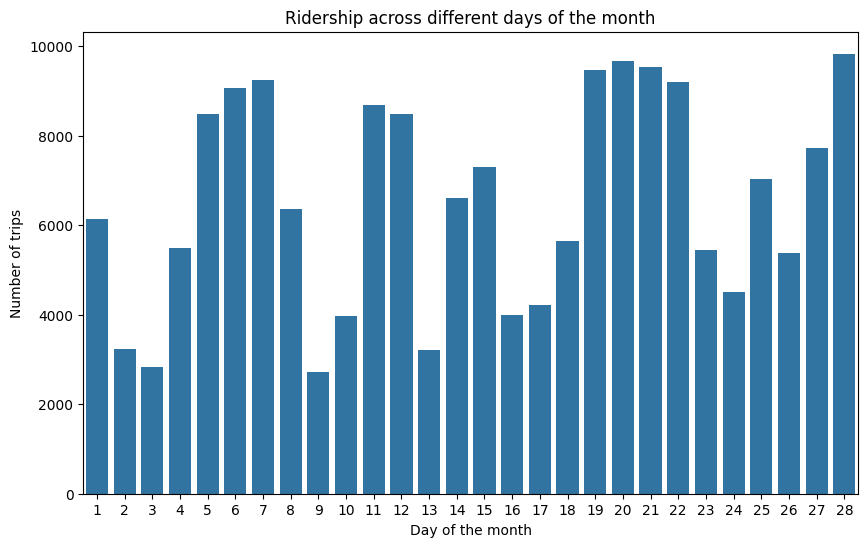

In [359]:
# - First I wanna see ridership across different days of the month
# convert start_time to datetime
fordgobike_clean['start_time'] = pd.to_datetime(fordgobike_clean['start_time'])
# extract day from start_time
fordgobike_clean['start_day'] = fordgobike_clean['start_time'].dt.day
# plot
plt.figure(figsize=[10,6])
sns.countplot(data=fordgobike_clean, x='start_day', color=sns.color_palette()[0])
plt.xlabel('Day of the month')
plt.ylabel('Number of trips')
plt.title('Ridership across different days of the month')
plt.show()

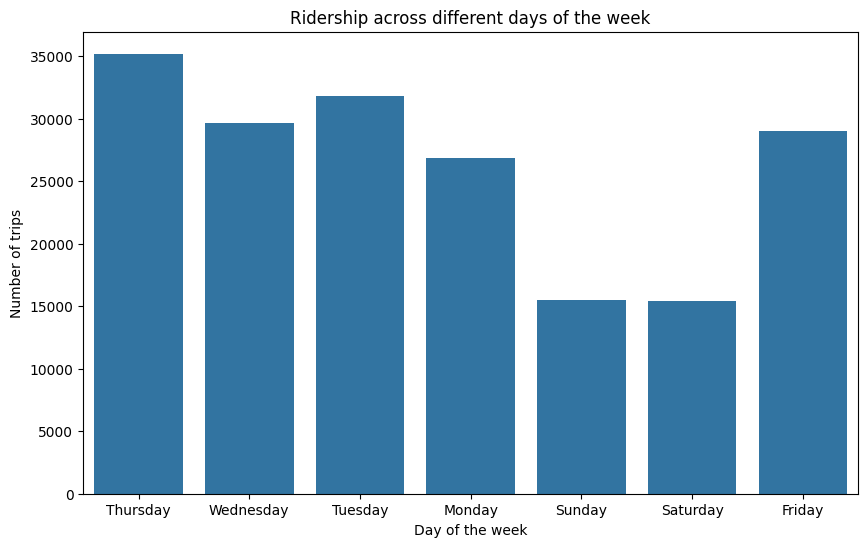

In [360]:
# graph to show the distribution of the  ridership across different days of the week
fordgobike_clean['start_weekday'] = fordgobike_clean['start_time'].dt.day_name()
plt.figure(figsize=[10,6])
sns.countplot(data=fordgobike_clean, x='start_weekday', color=sns.color_palette()[0])
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.title('Ridership across different days of the week')
plt.show()

In [361]:
fordgobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_day,start_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.763833,40,28,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984,Male,No,708.687783,39,28,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.915467,52,28,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.180533,35,28,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.425417,50,28,Thursday


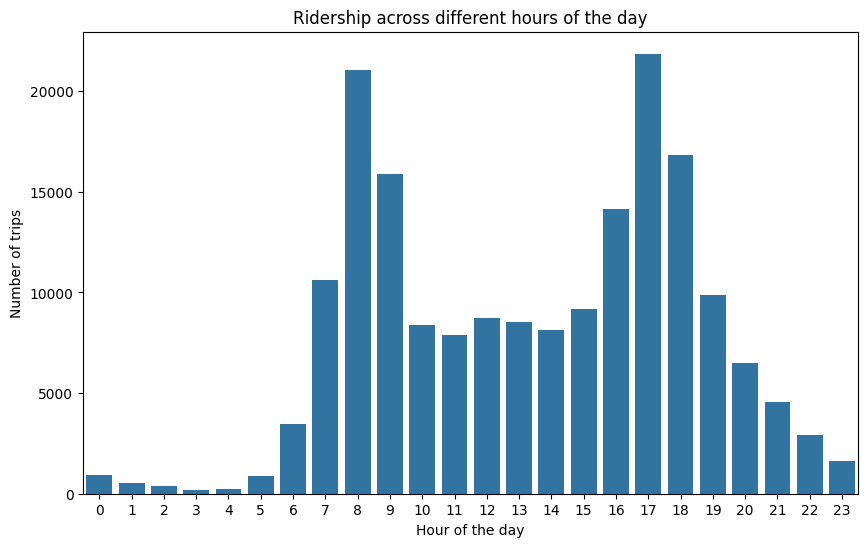

In [362]:
# ridership across different hours of the day
fordgobike_clean['start_hour'] = fordgobike_clean['start_time'].dt.hour
plt.figure(figsize=[10,6])
sns.countplot(data=fordgobike_clean, x='start_hour', color=sns.color_palette()[0])
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.title('Ridership across different hours of the day')
plt.show()

/tmp/ipykernel_245294/1762531319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fordgobike_clean, x='start_weekday',palette='viridis')


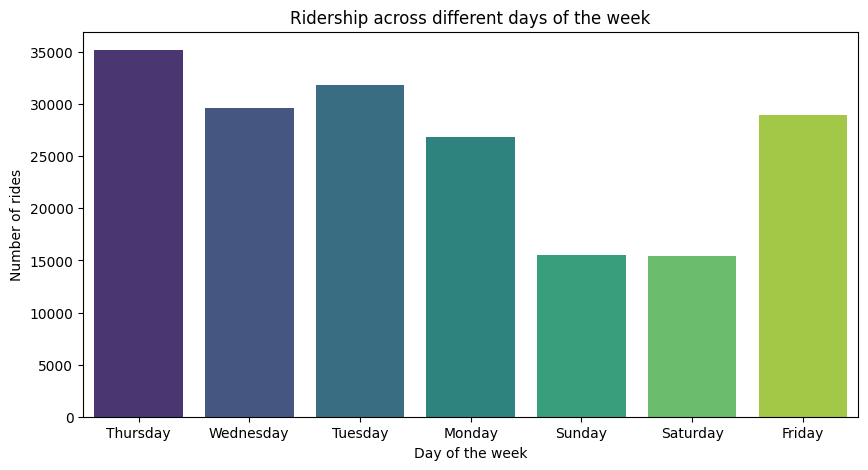

In [363]:
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean, x='start_weekday',palette='viridis')
plt.title('Ridership across different days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of rides')
plt.show()

/tmp/ipykernel_245294/4099211165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fordgobike_clean, x='user_type',palette='viridis')


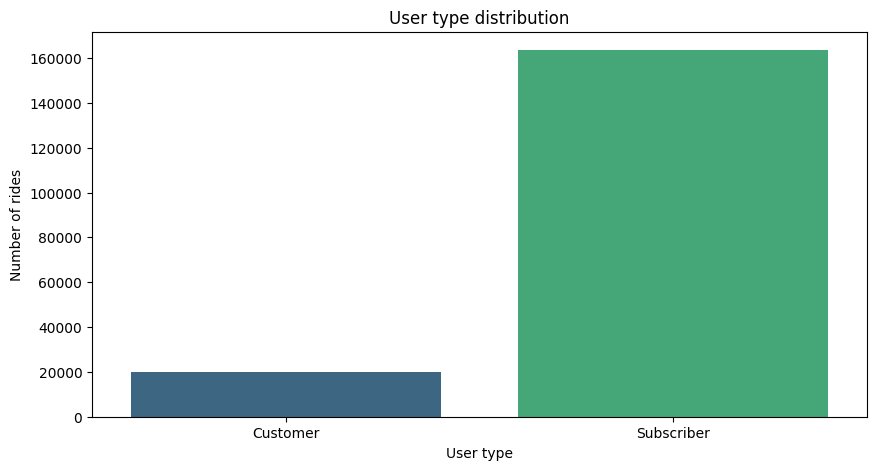

In [364]:
# user type distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean, x='user_type',palette='viridis')
plt.title('User type distribution')
plt.xlabel('User type')
plt.ylabel('Number of rides')
plt.show()

/tmp/ipykernel_245294/558614832.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=fordgobike_clean, x='member_age', bins=30, kde=True, palette='viridis')


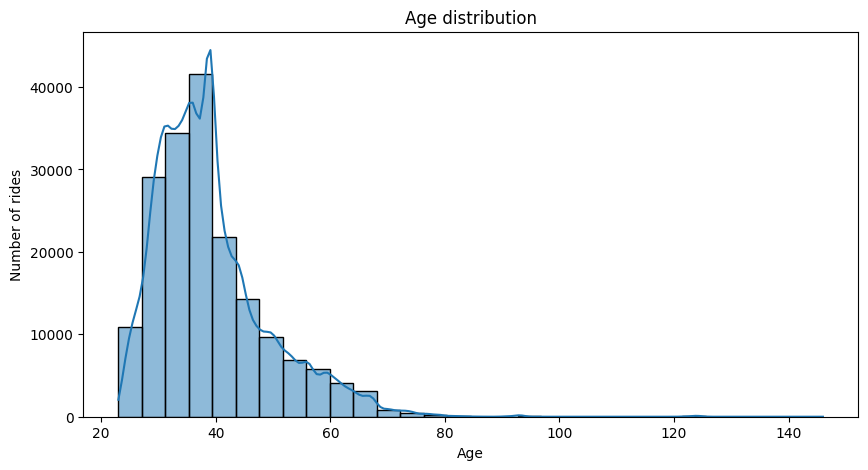

In [365]:
# age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=fordgobike_clean, x='member_age', bins=30, kde=True, palette='viridis')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of rides')
plt.show()

/tmp/ipykernel_245294/2898981591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fordgobike_clean, x='member_gender',palette='viridis')


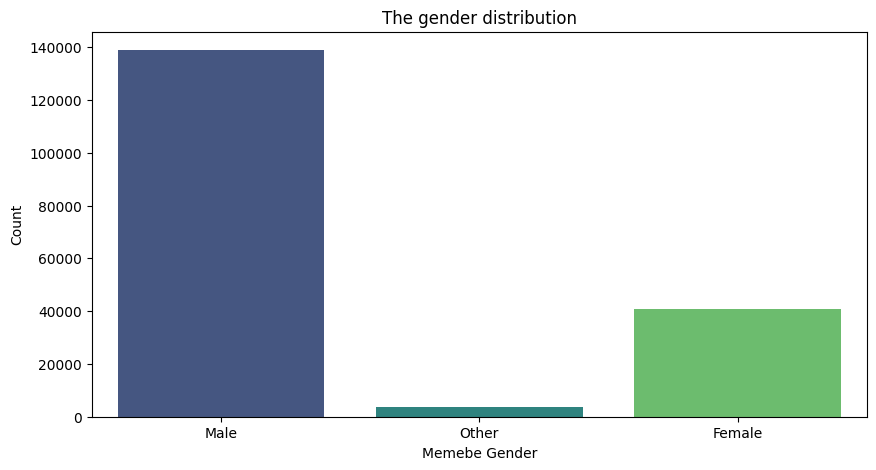

In [366]:
# gender distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean, x='member_gender',palette='viridis')
plt.title('The gender distribution')
plt.xlabel('Memebe Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_245294/237390941.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=fordgobike_clean, x='duration_min', bins=30, kde=True, palette='viridis', log_scale=True)


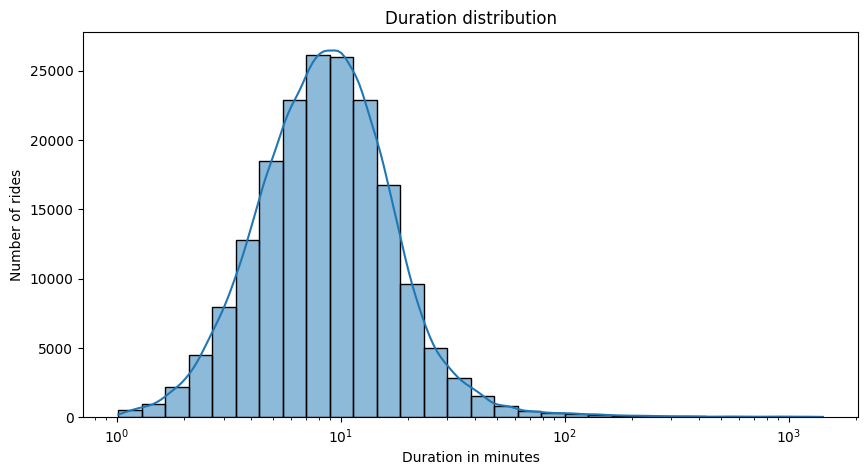

In [367]:
# duration in minutes distribution using log scale
plt.figure(figsize=(10, 5))
sns.histplot(data=fordgobike_clean, x='duration_min', bins=30, kde=True, palette='viridis', log_scale=True)
plt.title('Duration distribution')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of rides')
plt.show()

>  as we can see from the graph the duration distribution is semetric
 I used log scale to make it normal distribution
  most of the rides are between 1 and 100 minutes
 so i will remove the rides that are more than 100 minutes 

In [368]:

fordgobike_clean = fordgobike_clean[fordgobike_clean['duration_min'] <= 100]



In [369]:
fordgobike_clean['duration_min'].describe()

count    182503.000000
mean         10.689899
std           8.663211
min           1.018017
25%           5.411700
50%           8.544233
75%          13.175825
max          99.776400
Name: duration_min, dtype: float64

In [370]:
fordgobike_clean['member_age'].describe()

count    182503.000000
mean         39.180452
std           9.890008
min          23.000000
25%          32.000000
50%          37.000000
75%          43.000000
max         146.000000
Name: member_age, dtype: float64

- max age is 146! which is not normal.

In [371]:
# so i will remove the rows that have age more than 100
fordgobike_clean = fordgobike_clean[fordgobike_clean['member_age'] <= 100]

In [372]:
fordgobike_clean['member_age'].describe()

count    182428.000000
mean         39.145997
std           9.744441
min          23.000000
25%          32.000000
50%          37.000000
75%          43.000000
max          97.000000
Name: member_age, dtype: float64

<Axes: xlabel='member_age'>

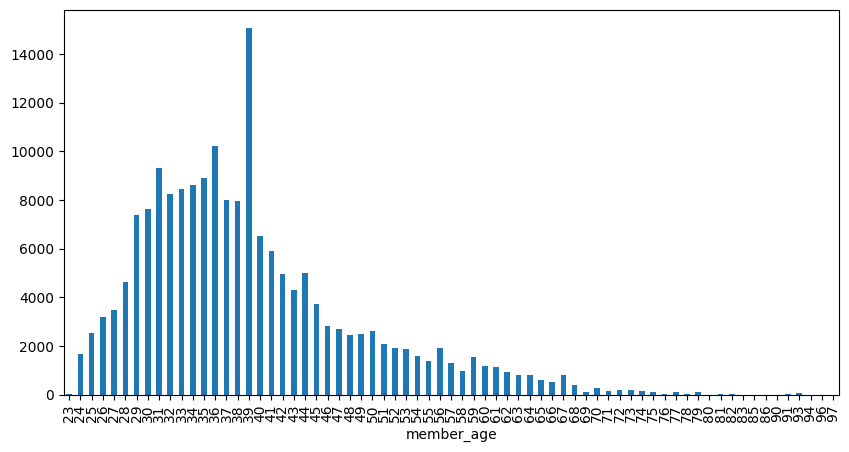

In [373]:
fordgobike_clean['member_age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))

In [374]:

Q1 = fordgobike_clean['member_age'].quantile(0.25)
Q3 = fordgobike_clean['member_age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fordgobike_clean = fordgobike_clean[(fordgobike_clean['member_age'] >= lower_bound) & (fordgobike_clean['member_age'] <= upper_bound)]

fordgobike_clean['member_age'].describe()

count    173466.000000
mean         37.786298
std           7.783488
min          23.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          59.000000
Name: member_age, dtype: float64

 this seems normal and acceptable

In [375]:
fordgobike_clean['member_age'].describe()

count    173466.000000
mean         37.786298
std           7.783488
min          23.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          59.000000
Name: member_age, dtype: float64

/tmp/ipykernel_245294/1024627658.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=fordgobike_clean, x='member_age', bins=30, kde=True, palette='viridis')


<Axes: xlabel='member_age', ylabel='Count'>

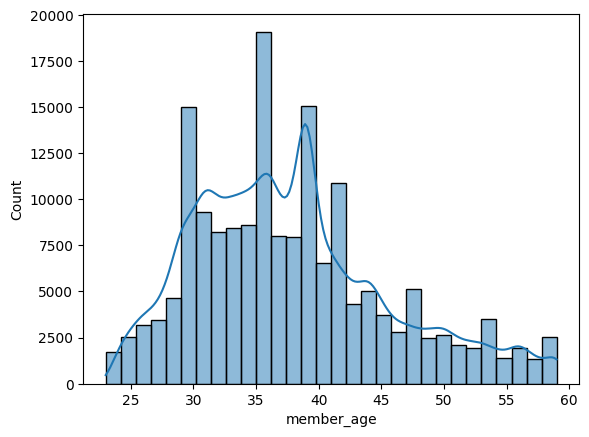

In [376]:
sns.histplot(data=fordgobike_clean, x='member_age', bins=30, kde=True, palette='viridis')


/tmp/ipykernel_245294/2494521261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='member_age', palette='viridis')


<Axes: xlabel='member_age'>

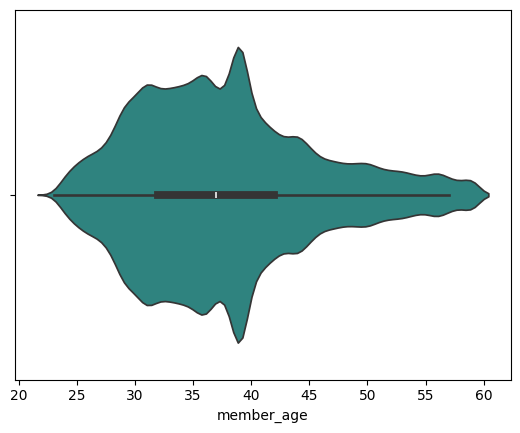

In [377]:
sns.violinplot(data=fordgobike_clean, x='member_age', palette='viridis')

this seems to be a good distribution for the age

In [378]:
# save the cleaned data
fordgobike_clean.to_csv('fordgobike_clean.csv', index = False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- yes, there were some unusual points in the data like the duration of the trip and the age of the members
 - i had to remove the rows that have duration more than 24 hours first and then I notice that the most durations from 0 to 100 minutes so i removed the rows that have duration more than 100 minutes
 - also the age of the members was from 0 to 140 years so i removed the rows that have age more than 100 years

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 - yes, the duration of the trip and the age of the members were unusual distributions so i had to remove the rows that have duration more than 24 hours and the rows that have age more than 100 years
- in duration in minutes distribution i used the log scale to make it in normal distribution    
- and i used the histplot to see the distribution more clearly 
- on other side i found that the distribution of the ridership across different days of the month is different some days have more rides in a row than others which may mean that there is a trend to ride the bike in some days more than others or the riders activate in some days more than others
 - for nun values i had to fill the null values in the station names with the names of the same longtitude and latitude station if exist else i used the ffill method
 - and for the station id's i used the bike id to fill the null values cause i noticed that the bike id is the same as the station id in some rows
 - and for the member_birth_year the only way I found was to fill the null values is to use the mean of the column and to be more accurate i used the mean of the column depending on the gender  



## Bivariate Exploration


/tmp/ipykernel_245294/3201788939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fordgobike_clean, x='start_weekday', y='duration_min', palette='viridis')


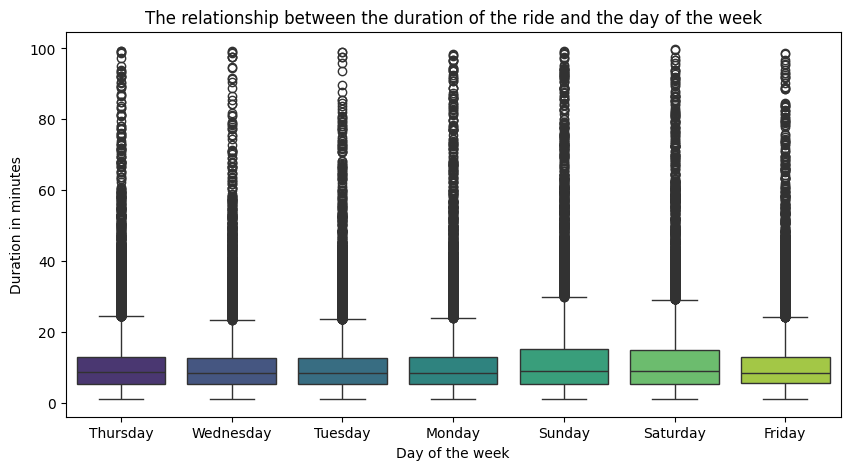

In [379]:
# the relationship between the duration of the ride and the day of the week
plt.figure(figsize=(10, 5))
sns.boxplot(data=fordgobike_clean, x='start_weekday', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Duration in minutes')
plt.show()

/tmp/ipykernel_245294/1846157986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fordgobike_clean, x='start_hour', y='duration_min', palette='viridis')


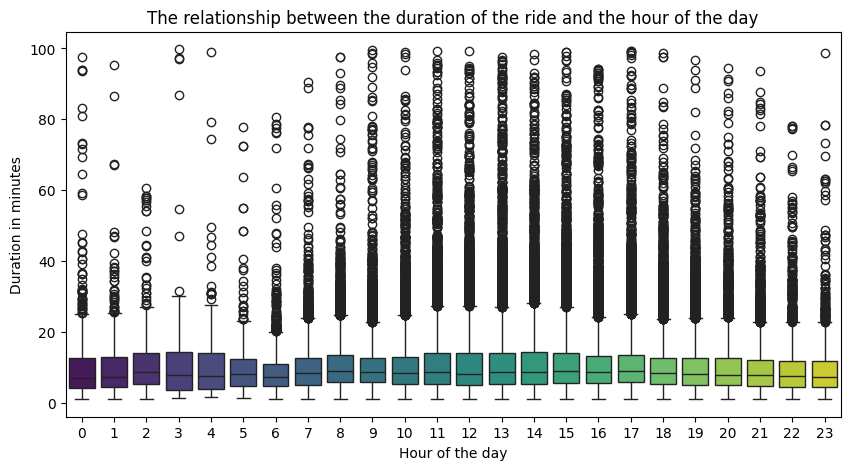

In [380]:
# the relationship between the duration of the ride and the hour of the day
plt.figure(figsize=(10, 5))
sns.boxplot(data=fordgobike_clean, x='start_hour', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Duration in minutes')
plt.show()

/tmp/ipykernel_245294/972978735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fordgobike_clean, x='user_type', y='duration_min', palette='viridis')


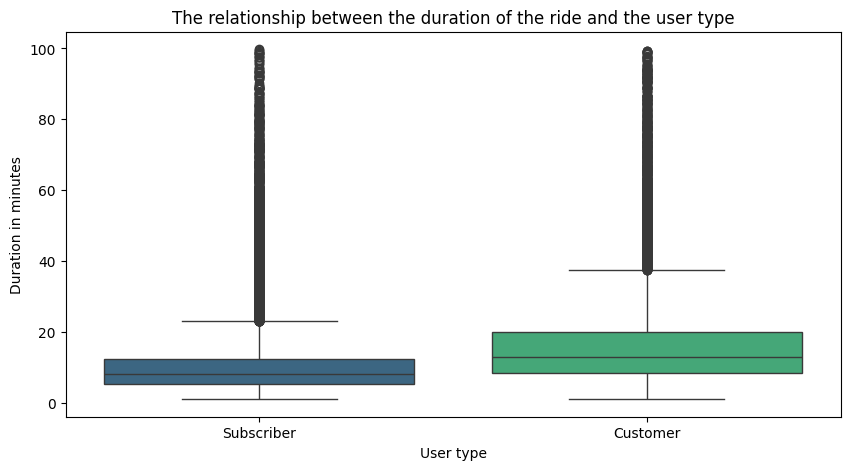

In [381]:
# the relationship between the duration of the ride and the user type
plt.figure(figsize=(10, 5))
sns.boxplot(data=fordgobike_clean, x='user_type', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the user type')
plt.xlabel('User type')
plt.ylabel('Duration in minutes')
plt.show()

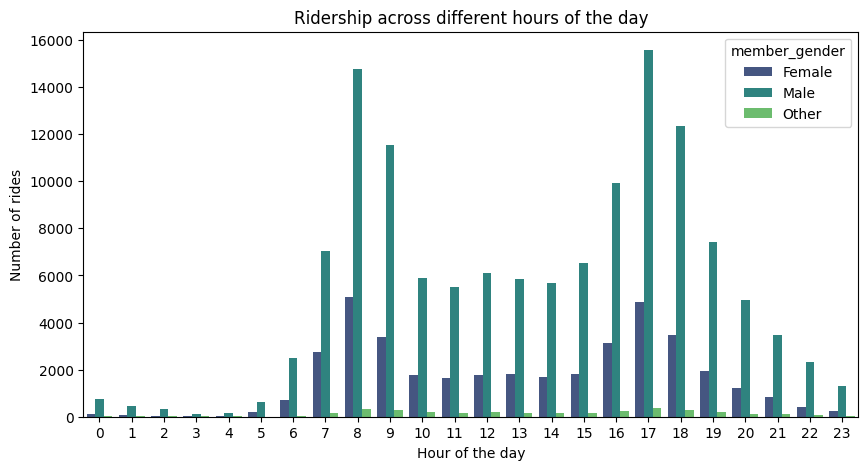

In [382]:
# ridership across different hours of the day siprating males and females
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean, x='start_hour', hue='member_gender',palette='viridis')
plt.title('Ridership across different hours of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.show()


/tmp/ipykernel_245294/2896155827.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=fordgobike_clean, x='member_age', y='duration_min', palette='viridis')


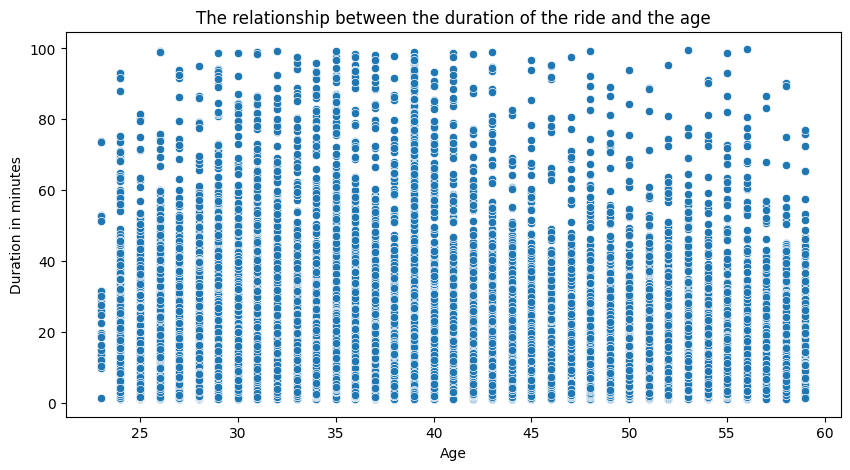

In [383]:
# the relationship between the duration of the ride and the age
plt.figure(figsize=(10, 5))
sns.scatterplot(data=fordgobike_clean, x='member_age', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the age')
plt.xlabel('Age')
plt.ylabel('Duration in minutes')
plt.show()

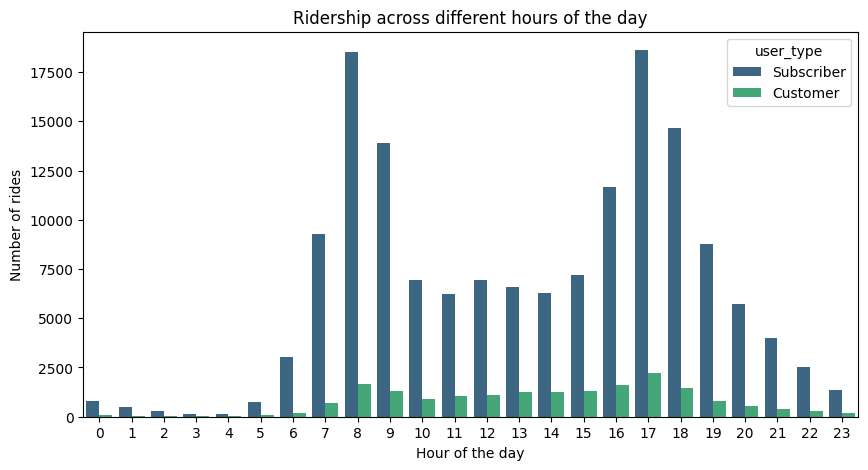

In [384]:
# ridership across different hours of the day and user type
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean, x='start_hour', hue='user_type',palette='viridis')
plt.title('Ridership across different hours of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.show()


/tmp/ipykernel_245294/249102851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='user_type', y='start_day', palette='viridis')
/tmp/ipykernel_245294/249102851.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='member_gender', y='start_day', palette='viridis')
/tmp/ipykernel_245294/249102851.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='user_type', y='member_age', palette='viridis')
/tmp/ipykernel_245294/249102851.py:16: FutureWarning: 

Passing 

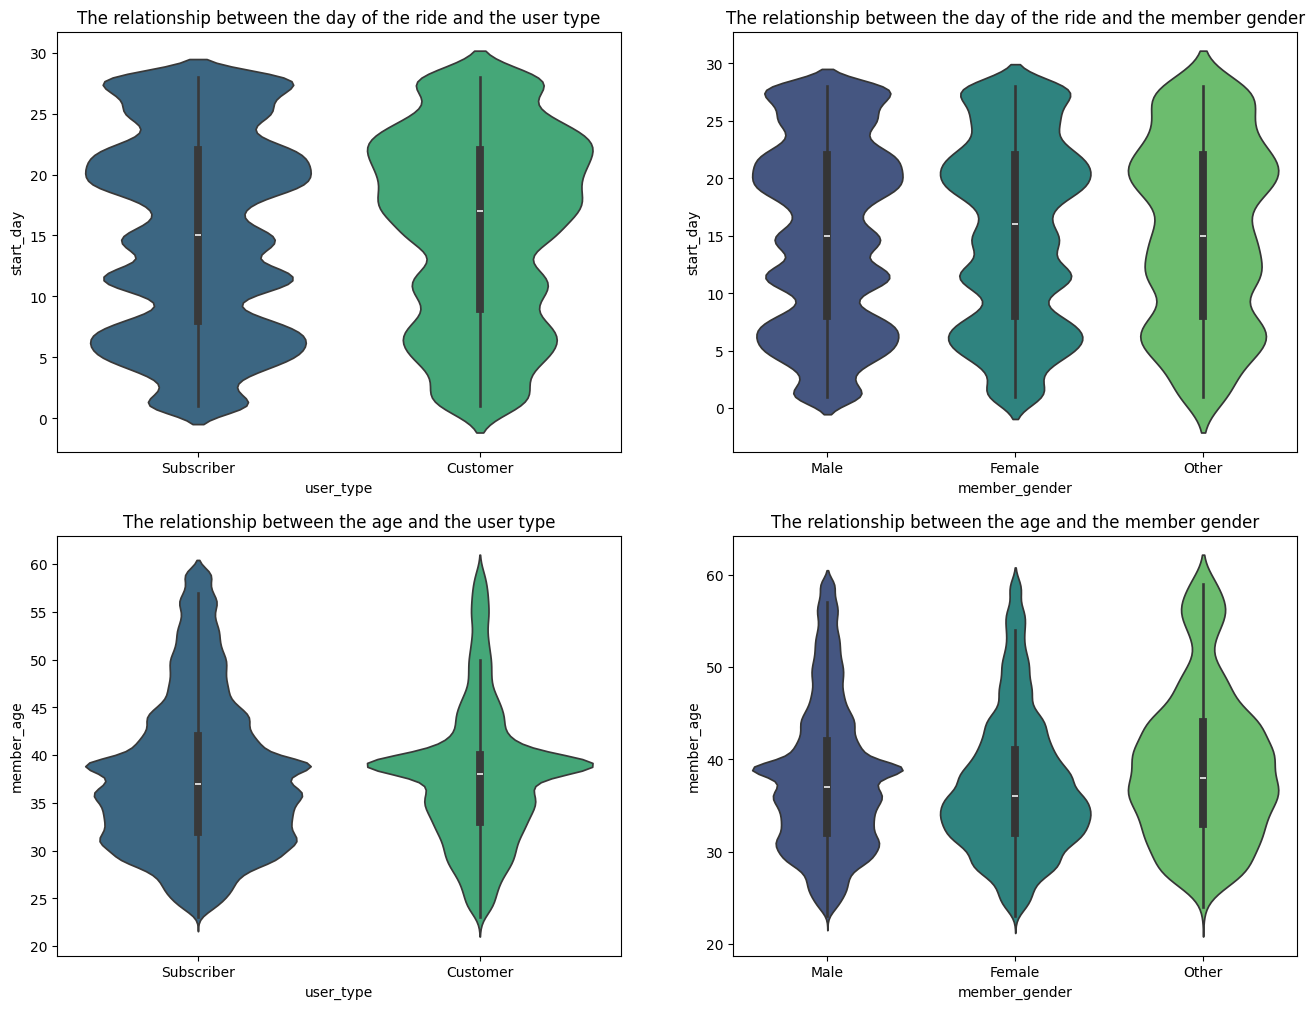

In [385]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.violinplot(data=fordgobike_clean, x='user_type', y='start_day', palette='viridis')
plt.title('The relationship between the day of the ride and the user type')

plt.subplot(2, 2, 2)
sns.violinplot(data=fordgobike_clean, x='member_gender', y='start_day', palette='viridis')
plt.title('The relationship between the day of the ride and the member gender')

plt.subplot(2, 2, 3)
sns.violinplot(data=fordgobike_clean, x='user_type', y='member_age', palette='viridis')
plt.title('The relationship between the age and the user type')

plt.subplot(2, 2, 4)
sns.violinplot(data=fordgobike_clean , x='member_gender', y='member_age', palette='viridis')
plt.title('The relationship between the age and the member gender')

plt.show()

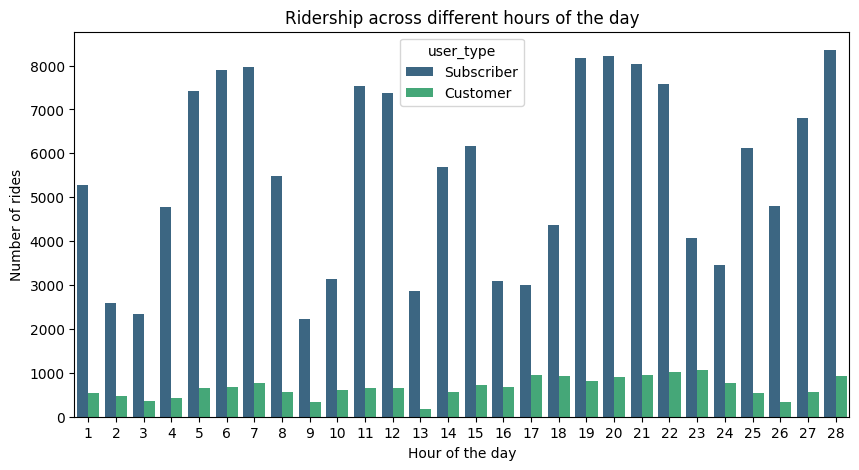

In [386]:
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean, x='start_day', hue='user_type',palette='viridis')
plt.title('Ridership across different hours of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.show()


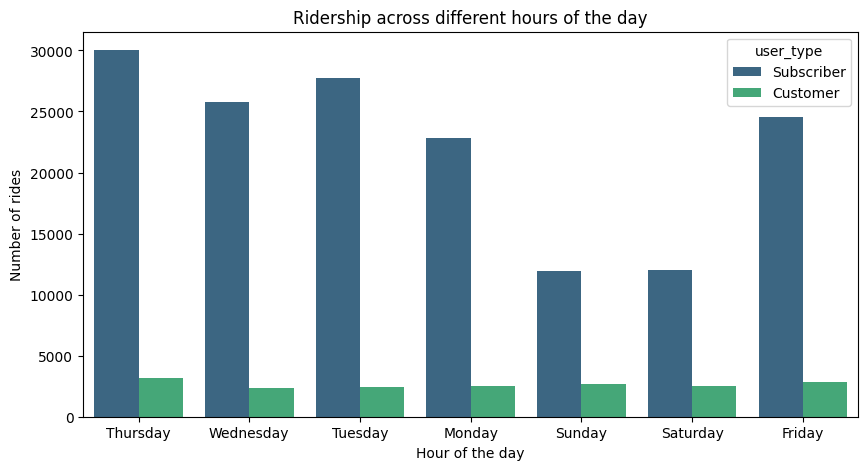

In [387]:
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean, x='start_weekday', hue='user_type',palette='viridis')
plt.title('Ridership across different hours of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.show()


/tmp/ipykernel_245294/1000111658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='user_type', y='start_day', palette='viridis')


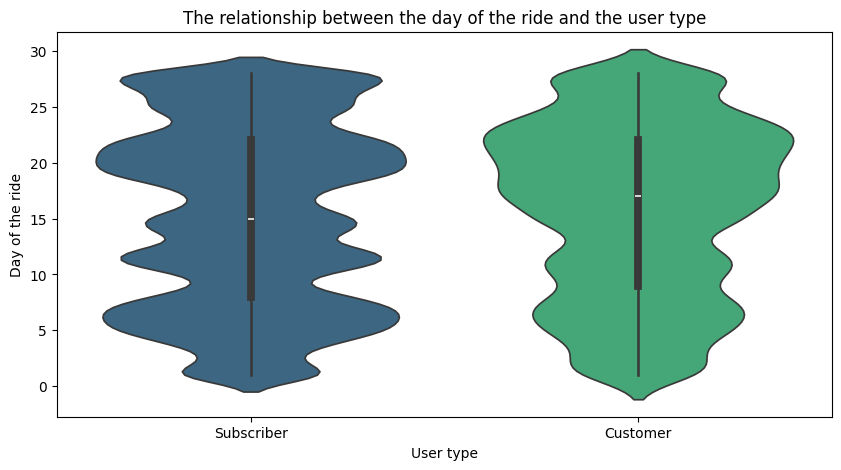

In [388]:
# the relationship between the day of the ride and the user type
plt.figure(figsize=(10, 5))
sns.violinplot(data=fordgobike_clean, x='user_type', y='start_day', palette='viridis')
plt.title('The relationship between the day of the ride and the user type')
plt.xlabel('User type')
plt.ylabel('Day of the ride')
plt.show()

# the observation from the above plots


- 1- the distribution of the ridership across different days of the month is different some days have more rides in a row than others
- 2- the distribution of the ridership across different days of the week is different some days have more rides than others
- 3- the distribution of the ridership across different hours of the day is different some hours have more rides than others
- 4- there is pattern in the ridership across different days of the motnth and the week
- 5- the relationship between the duration of the ride and the hour of the day
- 6- the relationship between the duration of the ride and the user type
- 7- ridership across different hours of the day siprating
- 8- ridership across different hours of the day and user type
- 9- the relationship between the day of the ride and the user type
- 10- the relationship between the day of the ride and the member
- 11- the relationship between the age and the user type


/tmp/ipykernel_245294/3555656319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='start_weekday', y='member_age', palette='viridis')


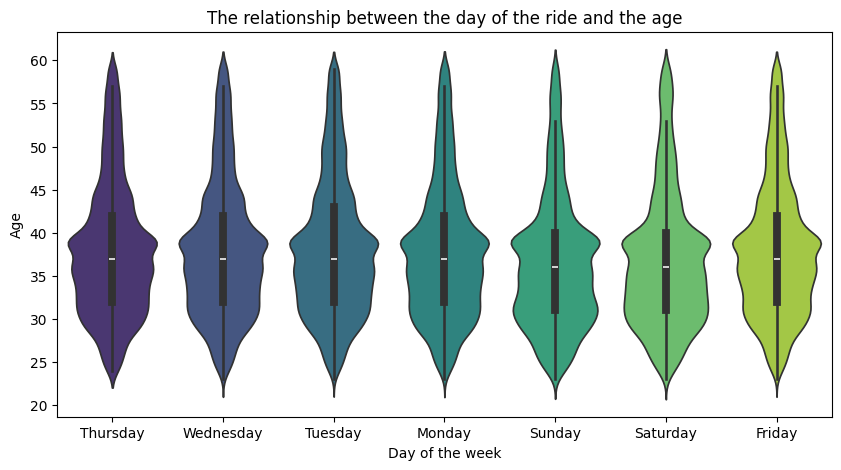

In [389]:
# Age and and weekday
plt.figure(figsize=(10, 5))
sns.violinplot(data=fordgobike_clean, x='start_weekday', y='member_age', palette='viridis')
plt.title('The relationship between the day of the ride and the age')
plt.xlabel('Day of the week')
plt.ylabel('Age')
plt.show()

/tmp/ipykernel_245294/3613436696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='member_gender', y='member_age', palette='viridis')


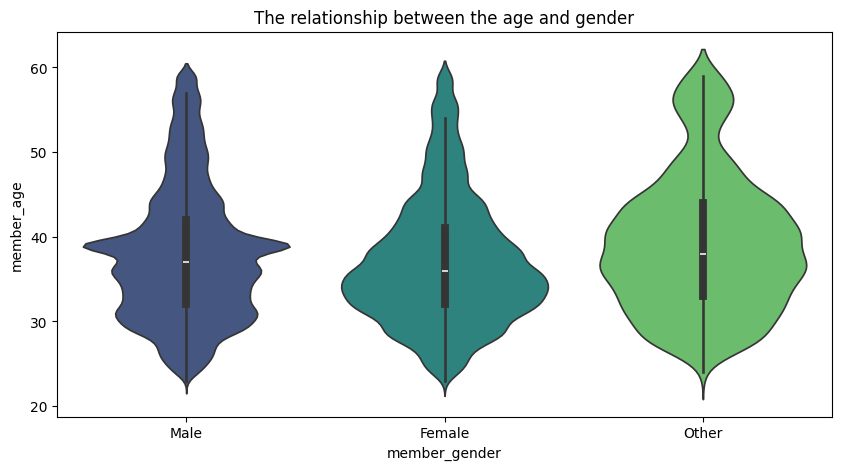

In [390]:
# Gender Age Trends
plt.figure(figsize=(10, 5))
sns.violinplot(data=fordgobike_clean, x='member_gender', y='member_age', palette='viridis')
plt.title('The relationship between the age and gender')
plt.show()

/tmp/ipykernel_245294/1881263534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=fordgobike_clean, x='user_type', y='member_age', palette='viridis')


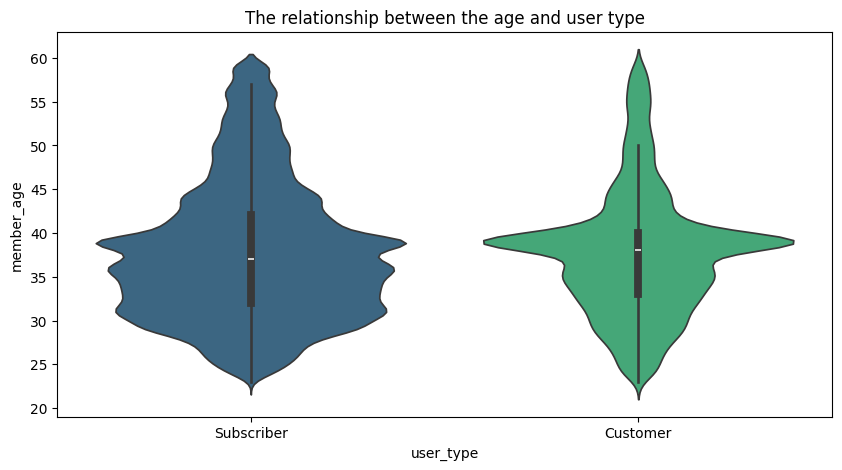

In [391]:
# Subscriber vs Customer Age
plt.figure(figsize=(10, 5))
sns.violinplot(data=fordgobike_clean, x='user_type', y='member_age', palette='viridis')
plt.title('The relationship between the age and user type')
plt.show()


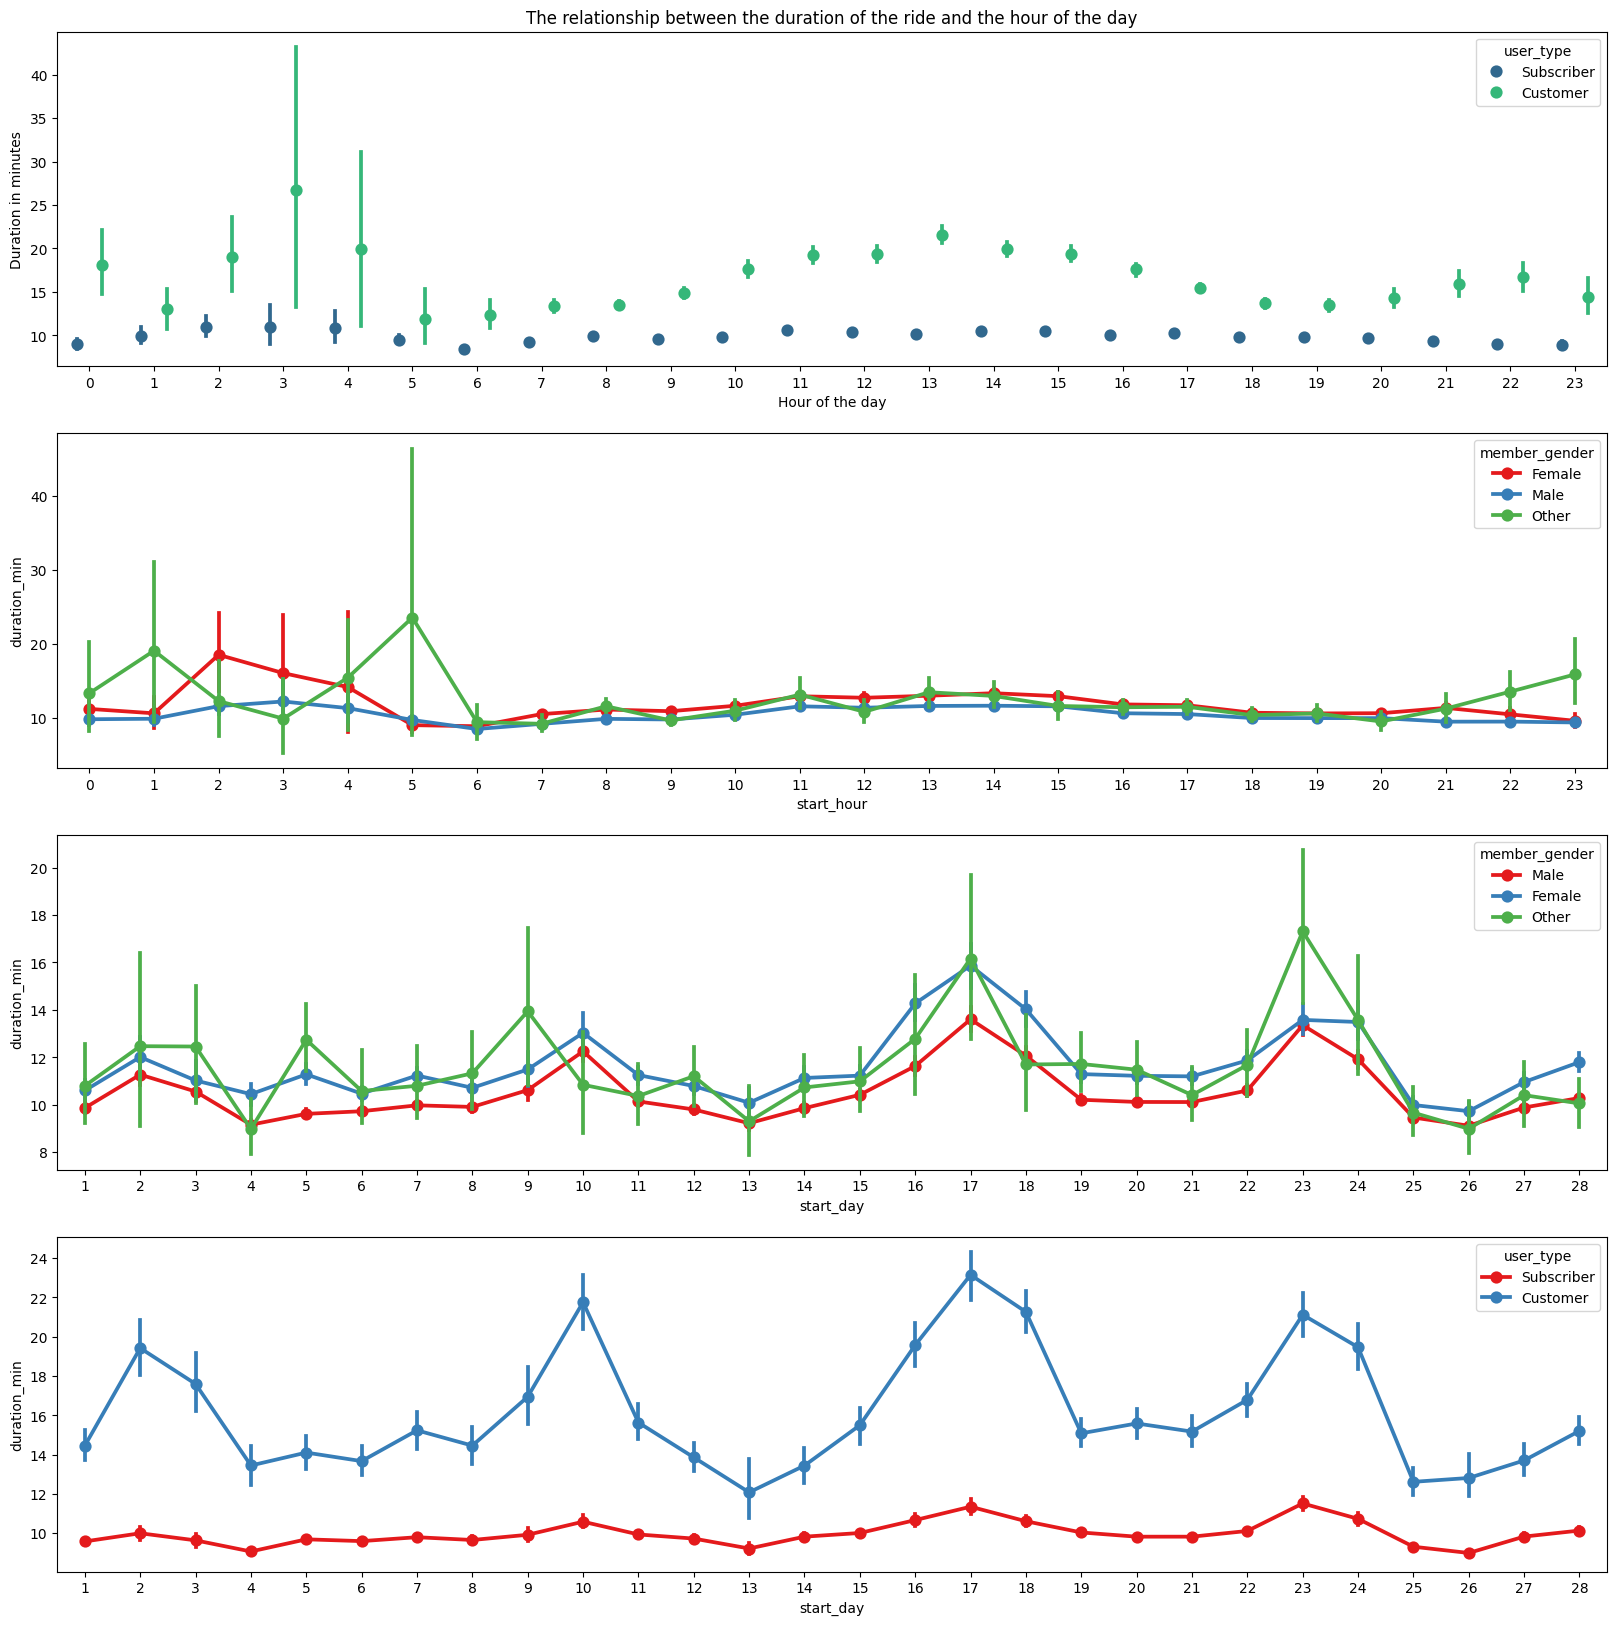

In [392]:
plt.figure(figsize = [20,20])
plt.subplot(4, 1, 1)
sns.pointplot(data = fordgobike_clean, x = 'start_hour', y = 'duration_min', hue = 'user_type', palette = 'viridis', linestyles = '', dodge = 0.4)
plt.title('The relationship between the duration of the ride and the hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Duration in minutes')

plt.subplot(4, 1, 2)
sns.pointplot(data = fordgobike_clean, x = 'start_hour', y = 'duration_min', hue='member_gender', palette = 'Set1');


plt.subplot(4, 1, 3)
sns.pointplot(data = fordgobike_clean, x = 'start_day', y = 'duration_min', hue='member_gender', palette = 'Set1');

plt.subplot(4, 1, 4)
sns.pointplot(data = fordgobike_clean, x = 'start_day', y = 'duration_min', hue='user_type', palette = 'Set1');


plt.show()

- Ridership across different days of the month:
- The number of rides is almost the same across different days of the month.
- Ridership across different days of the week:
- The number of rides is higher on weekdays than weekends.
- its clear that subscribers users are more consistent in riding the bikes than customers and the duration of the rides is higher for subscribers than customers.

# Observations:

- There are the most cyclists at 5:00 PM on Tuesday.
- There are the most male cyclists at 5:00 PM. There are the most female cyclists at 8:00 AM and 5:00 PM.
- There are the most subscriber type cyclists at 5:00 PM. There are the most non-subscriber type cyslists at 5:00 PM too.
- There are the most male cyclists on Tuesday. There are the most female cyclists on Tuesday too.
- There are the most subscriber type cyclists on Tuesday. There are the most customer type cyclists on Saturday.
- Most subscriber type cyclists are between 30 and 40 years old. Most non-subscriber type cyclists are between 30 and 40 years old too.


/tmp/ipykernel_245294/824172578.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=fordgobike_clean, x='start_weekday', y='duration_min', palette='viridis')


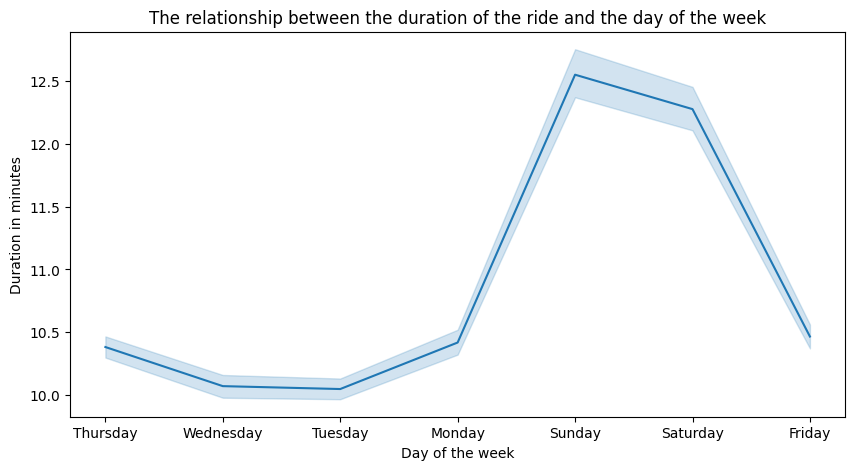

In [393]:

# line plot of the duration of the ride across different days of the week
plt.figure(figsize=(10, 5))
sns.lineplot(data=fordgobike_clean, x='start_weekday', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Duration in minutes')

plt.show()

/tmp/ipykernel_245294/1905323794.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=fordgobike_clean, x='start_day', y='duration_min', palette='viridis')


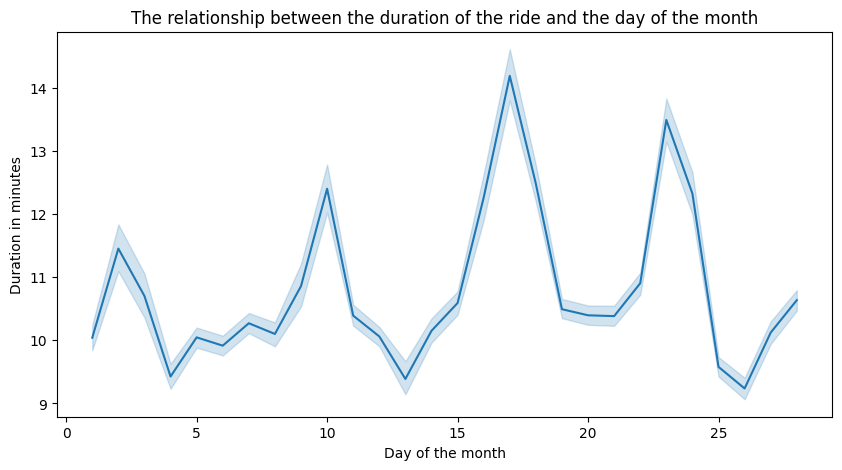

In [394]:
# line plot of the duration of the ride across different days of the month
plt.figure(figsize=(10, 5))
sns.lineplot(data=fordgobike_clean, x='start_day', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Duration in minutes')

plt.show()

- Ridership across different days of the month: the number of trips is way different across different days of the month, the number of trips is higher in some of the month.
- it keeps go up and down during the month.which in data analyst called seasonality.
- Ridership across different days of the week: the number of trips is higher in the second half of the week and it goes down in the first half of the week.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a seasonality in the ridership across different days of the month and hours of the day we can see that the ridership is going hight and low among the month
 we can split the days of the month to 8 parts 1-4 high ridership 5-8 low ridership 9-12 high ridership 13-15 low ridership 16-19 high ridership 20-22 low ridership 23-25 high ridership 26-27 low ridership 28 is high ridership
 gender disparity On average, male cyclists tend to ride for a longer duration than their female counterparts.

    


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes, i observed that subscribers are more than customers and they are more consistent in the number of rides across different days of the week and hours of the day and theire duration is more than the customers also On average, subscriber-type cyclists heigher range of ages is bigger than customer-type cyclists.

## Multivariate Exploration

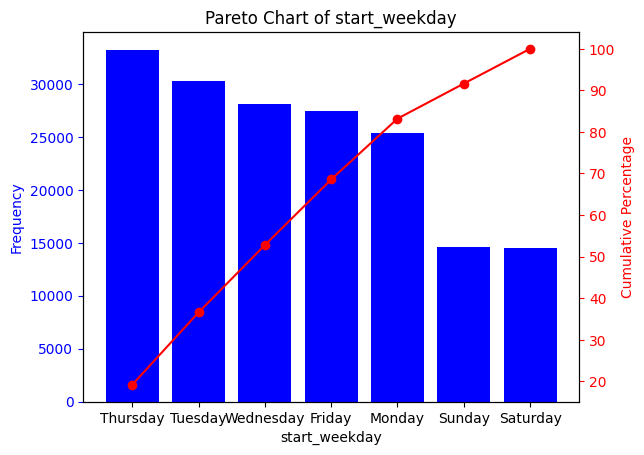

In [395]:
def pareto(data, column):
    # Count the number of occurrences of each value
    counts = data[column].value_counts()
    
    # Calculate the cumulative percentage of the values
    cumulative_percents = 100 * counts.cumsum() / counts.sum()
    
    # Create the Pareto chart
    fig, ax1 = plt.subplots()
    ax1.bar(counts.index, counts, color='b')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency', color='b')
    ax1.tick_params('y', colors='b')
    
    ax2 = ax1.twinx()
    ax2.plot(counts.index, cumulative_percents, color='r', marker='o')
    ax2.set_ylabel('Cumulative Percentage', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.title('Pareto Chart of ' + column)
    plt.xticks(rotation=90)
    plt.show()

pareto(fordgobike_clean, 'start_weekday')

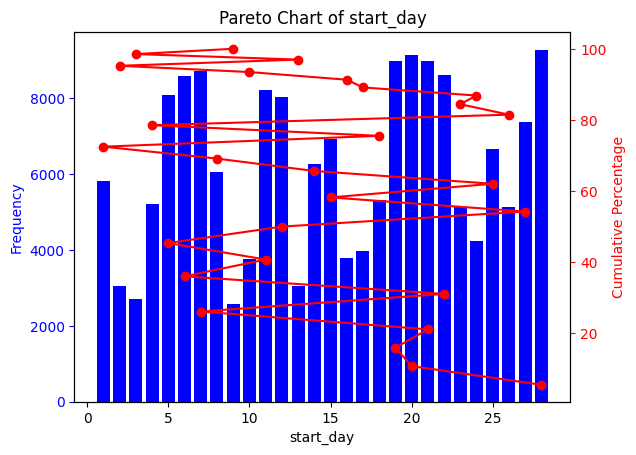

In [396]:
pareto(fordgobike_clean, 'start_day')

<Figure size 1000x500 with 0 Axes>

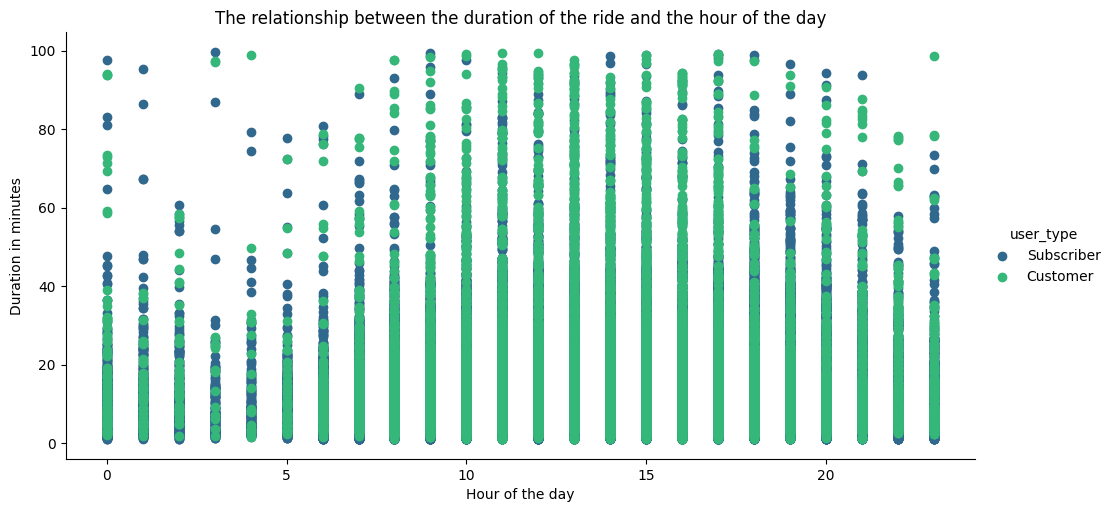

In [397]:
plt.figure(figsize=(10, 5))
g = sns.FacetGrid(data=fordgobike_clean, hue='user_type', palette='viridis', height=5, aspect=2)
g.map(plt.scatter, 'start_hour', 'duration_min').add_legend()
plt.title('The relationship between the duration of the ride and the hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Duration in minutes')



plt.show()

<Figure size 1000x500 with 0 Axes>

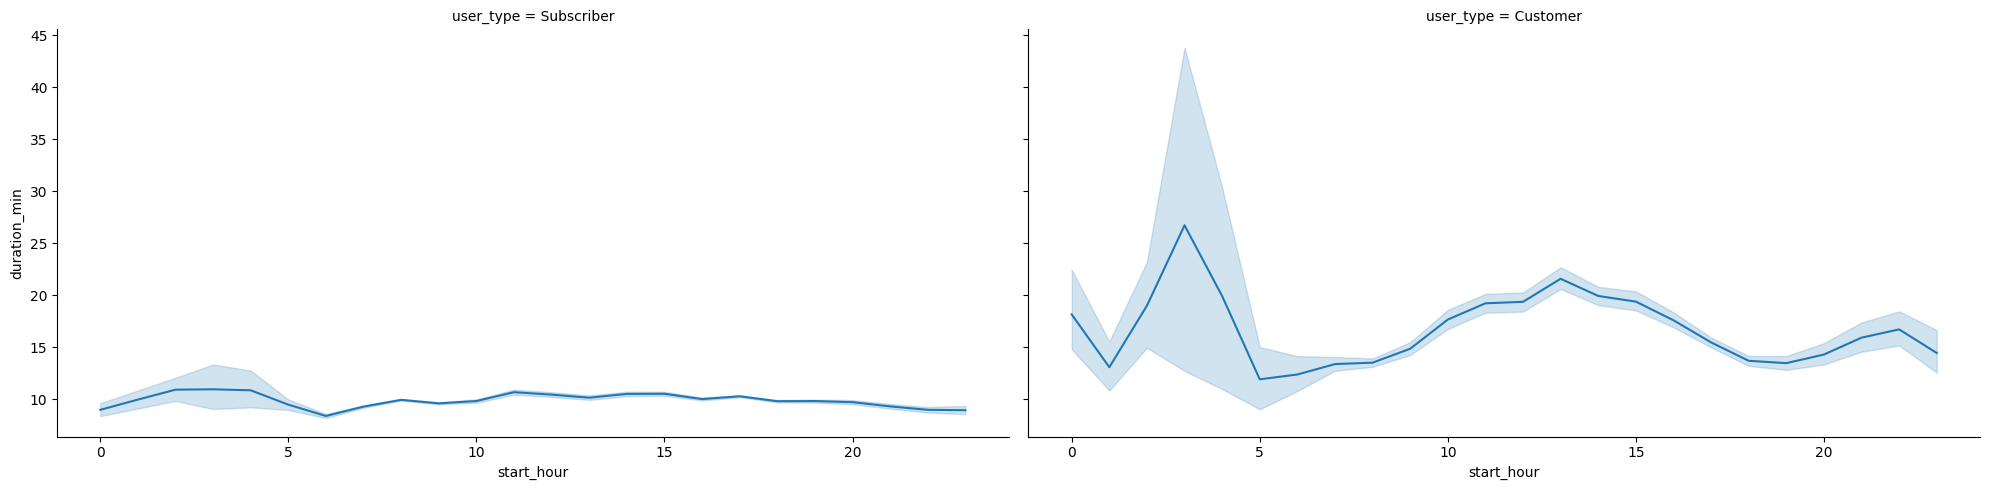

In [398]:
def facetplot(x, y, **kwargs):
    sns.lineplot(x=x, y=y, **kwargs)
    
plt.figure(figsize=(10, 5))
g = sns.FacetGrid(data=fordgobike_clean, col='user_type', height=5, aspect=2)
g.map(facetplot, 'start_hour', 'duration_min')

plt.show()

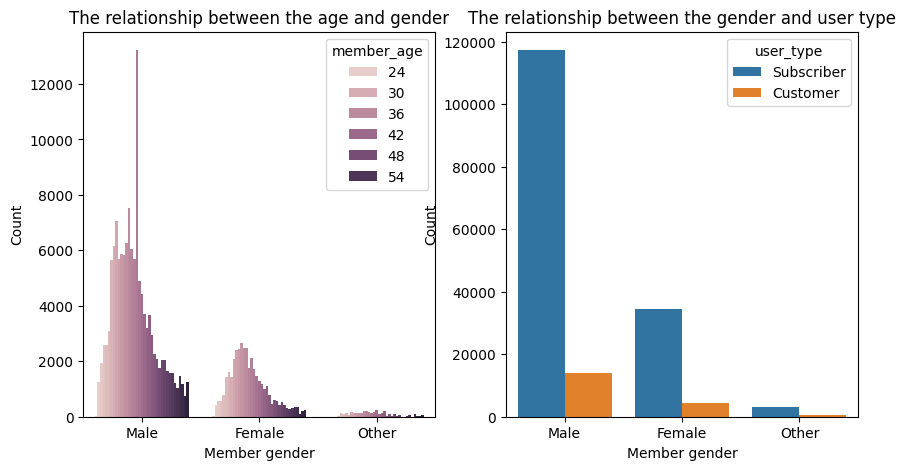

In [399]:
fig = plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
sns.countplot(data=fordgobike_clean, x='member_gender', hue='member_age')
plt.title('The relationship between the age and gender')
plt.xlabel('Member gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=fordgobike_clean, x='member_gender', hue='user_type')
plt.title('The relationship between the gender and user type')
plt.xlabel('Member gender')
plt.ylabel('Count')
plt.show()

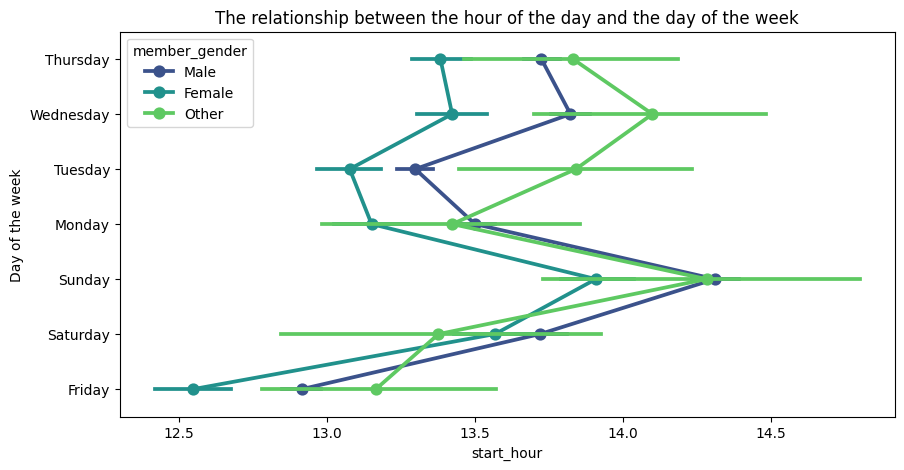

In [400]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=fordgobike_clean, x='start_hour', y='start_weekday', hue='member_gender', palette='viridis')
plt.title('The relationship between the hour of the day and the day of the week')
plt.ylabel('Day of the week')
plt.show()



/tmp/ipykernel_245294/4051406473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Female'], x='start_hour', palette='viridis')


<Axes: xlabel='start_hour', ylabel='count'>

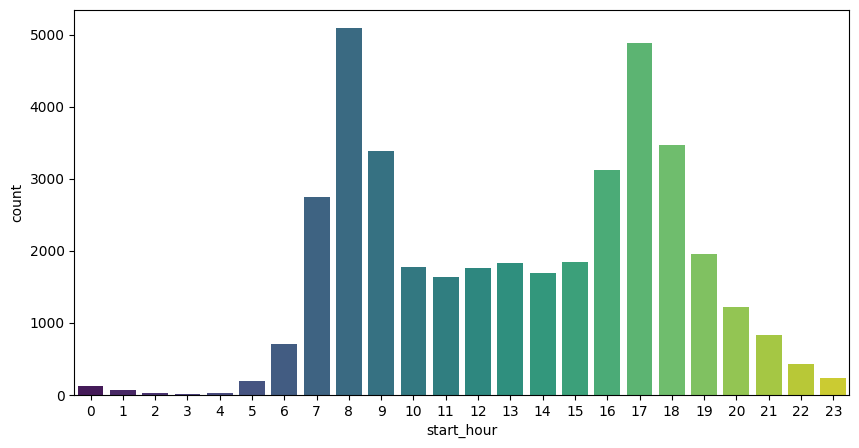

In [401]:
# only females
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Female'], x='start_hour', palette='viridis')


/tmp/ipykernel_245294/3117315706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Male'], x='start_hour', palette='viridis')


<Axes: xlabel='start_hour', ylabel='count'>

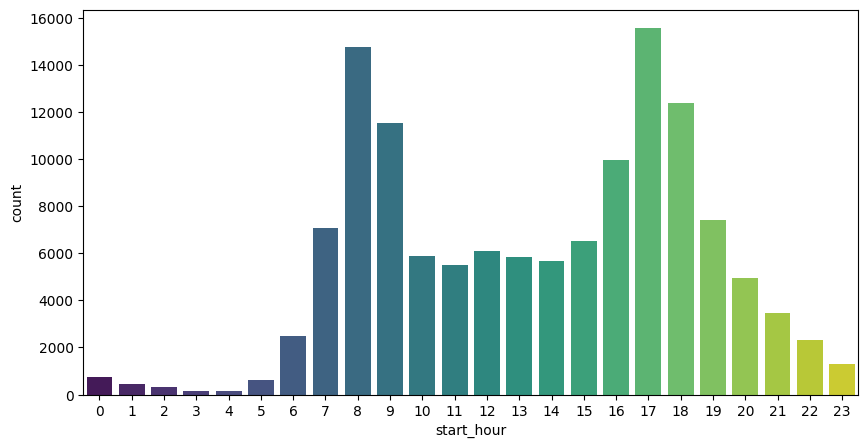

In [402]:
# only males
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Male'], x='start_hour', palette='viridis')


/tmp/ipykernel_245294/4141003197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Male'], x='start_day', palette='viridis')


<Axes: xlabel='start_day', ylabel='count'>

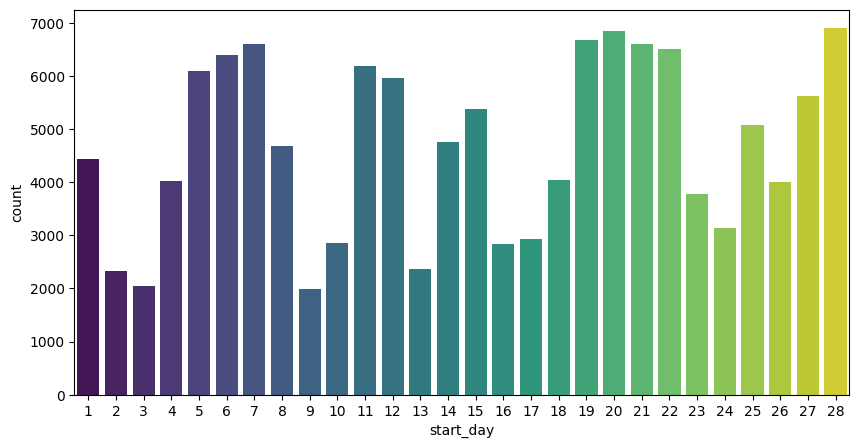

In [403]:
# only males
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Male'], x='start_day', palette='viridis')


/tmp/ipykernel_245294/3031613976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Female'], x='start_day', palette='viridis')


<Axes: xlabel='start_day', ylabel='count'>

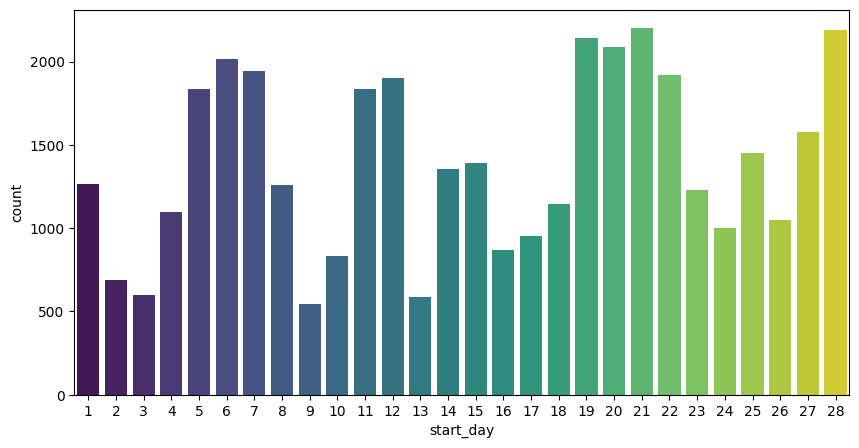

In [404]:
# only females
plt.figure(figsize=(10, 5))
sns.countplot(data=fordgobike_clean[fordgobike_clean['member_gender'] =='Female'], x='start_day', palette='viridis')


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>
- the two genders active among the week and among the month is almost the same which is a little bit surprising but still a good thing
- the user type distribution not the same among the week and among the month
- the most active hours of the day are 8 am and 5 pm which is the time of going to work and going back home which is expected

### Were there any interesting or surprising interactions between features?

> 

- the most active days of the week are Tuesday and Thursday which is a little bit surprising for tusday but still expected for thursday
- the most active days of the month are 21 and 28 which is also a little bit surprising
- the subscribers have the same seosonality in the rides as the customers even though the number of subscribers is much higher than the number of customers and their duration is much higher than the customers but they have the same seasonality in the rides 

## Conclusions
####  From all the above, it's evident that ridership patterns exhibit seasonality across days of the month and hours of the day, with fluctuations in activity levels.These variations underscore the impact of factors like weekdays versus weekends, peak commuting hours, and specific user behaviors on service utilization. Male cyclists generally ride longer than females, and subscribers show more consistent ride patterns and longer durations compared to customers. Notably, the peak riding times align with commute hours. Age distribution among cyclists peaks between 30-40 years old, especially among subscribers.



In [405]:
#  jupyter nbconvert Part_I_exploration_template.ipynb --to pdf
!jupyter nbconvert --to html Part_I_exploration_template.ipynb



[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 37 image(s).
[NbConvertApp] Writing 2966949 bytes to Part_I_exploration_template.html
